## Ecuación de Shomate. Parte 1

In [ ]:
## Dr. Pedro A. González Beermann
## Universidad Autónoma de Chiriquí

In [2]:
import numpy as np
import matplotlib.pyplot as plt

<h2>Coeficientes de la Ecuación de Shomate para el NO<sub>2</sub></h2>
<img src="coefshomate.png"><br>
<img src="shomate1-02.png">

<a href="https://webbook.nist.gov">Sitio Web del NIST</a>

In [19]:
## Coeficientes de Shomate para el NO2
A=16.1085
B=75.89525
C=-54.38740
D=14.30777
E=0.239423


### Cálculo de Cp vs T
$C_p^o=A + B*t + C*t^2 + D*t^3 + E/t^2$  donde $t=T/1000$


$X*\beta=C_p^o$

In [22]:

beta=np.array([A,B,C,D,E])  #vector de los coeficientes beta
dT=0.1
T=np.arange(298,1200,dT)    #intervalo de temperatura
t=T/1000                    #se requiere dividir entre 1000 
## Cp° = A + B*t + C*t2 + D*t3 + E/t2
X=np.array([np.ones(len(T)),t,t**2,t**3,1/t**2]).T   #matriz del polinomio en t 
Cp=X.dot(beta)   #producto punto
print(Cp)

[36.97018433 36.97310458 36.97602582 ... 53.75296692 53.75365684
 53.75434671]


In [ ]:
## Comparar estos valores de Cp con la tabla en el NIST

## Gráfica Cp vs T

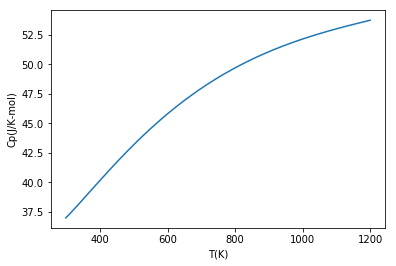

In [24]:
plt.plot(T,Cp)
plt.xlabel("T(K)")
plt.ylabel("Cp(J/K-mol)")
plt.show()

## Calculo de la Entalpía en el intervalo 298-1200 K

$\Delta H(T)=\int_{298}^T Cp(T)*dT$

$H(T)=H_f(298K)^o+\Delta H(T)$

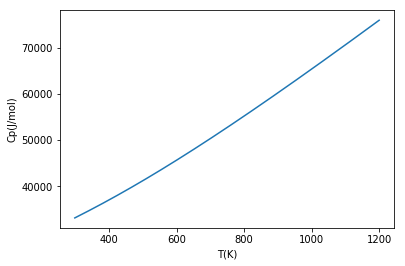

In [29]:
H298_gas=33.1     #kJ/mol  Este dato se puede encontrar en el sitio NIST
deltaH=np.cumsum(Cp*dT)+H298_gas*1000         #J/mol     
plt.plot(T,deltaH)
plt.xlabel("T(K)")
plt.ylabel("H(J/mol)")
plt.show()

## Cálculo de la entropía

$ \Delta S(T)=\int_{298}^T \frac{Cp(T)}{T}*dT $

$S(T)=S_f(298K)^o+\Delta S(T)$

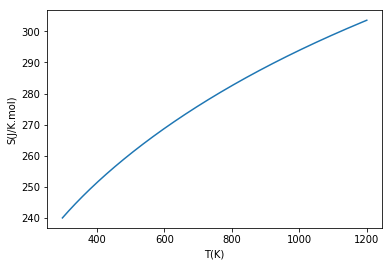

In [33]:
S298_gas=240.04     #J/mol  Este dato se puede encontrar en el sitio NIST
deltaS=np.cumsum(Cp/T*dT)+S298_gas        #J/mol     
plt.plot(T,deltaS)
plt.xlabel("T(K)")
plt.ylabel("S(J/K.mol)")
plt.show()

## Cálculo de la energía libre

$ \Delta G=\Delta H - T* \Delta S$

In [34]:
deltaG=deltaH-T*deltaS

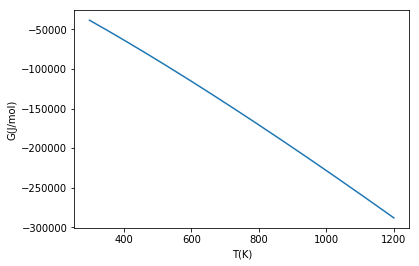

In [37]:
plt.plot(T,deltaG)
plt.xlabel("T(K)")
plt.ylabel("G(J/mol)")
plt.show()